In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

churn_data = pd.read_csv('churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

/var/folders/sl/l3rskhrs13qdsmkmgwnd1c5w0000gp/T/ipykernel_48795/3970732126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_clients_df['status'] = count_clients_df['Exited'].apply(lambda x: 'ушедший клиент' if x == 1 else 'лояльный клиент')


Text(0.5, 1.0, 'Cоотношение ушедших и лояльных клиентов')

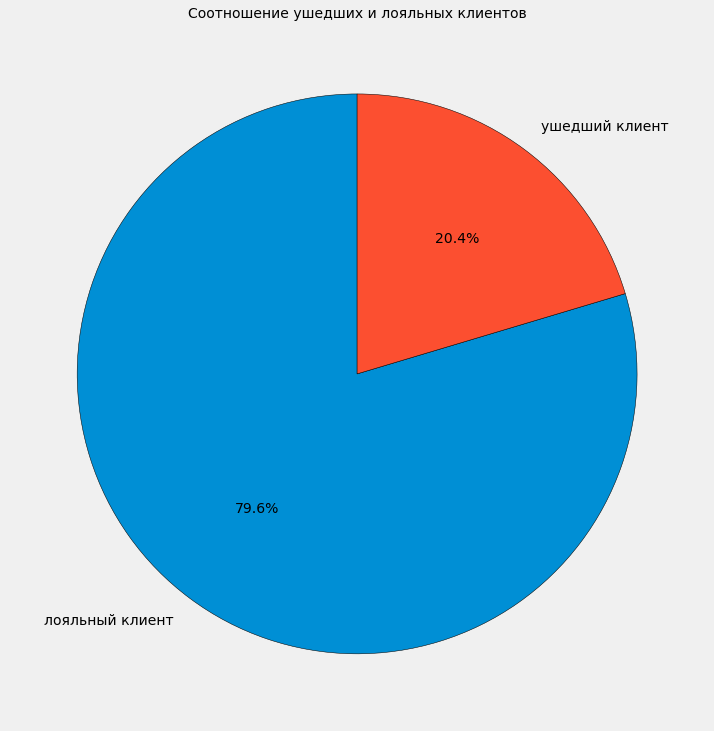

In [2]:
count_clients_df = churn_data[['Exited']]
count_clients_df['status'] = count_clients_df['Exited'].apply(lambda x: 'ушедший клиент' if x == 1 else 'лояльный клиент')
count_clients_df = pd.DataFrame(count_clients_df.groupby('status')['Exited'].count())

plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(12, 12))
plt.pie(
    count_clients_df['Exited'],
    labels=count_clients_df.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops= {'edgecolor': 'black'}
)
plt.title('Cоотношение ушедших и лояльных клиентов', fontsize=14)

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

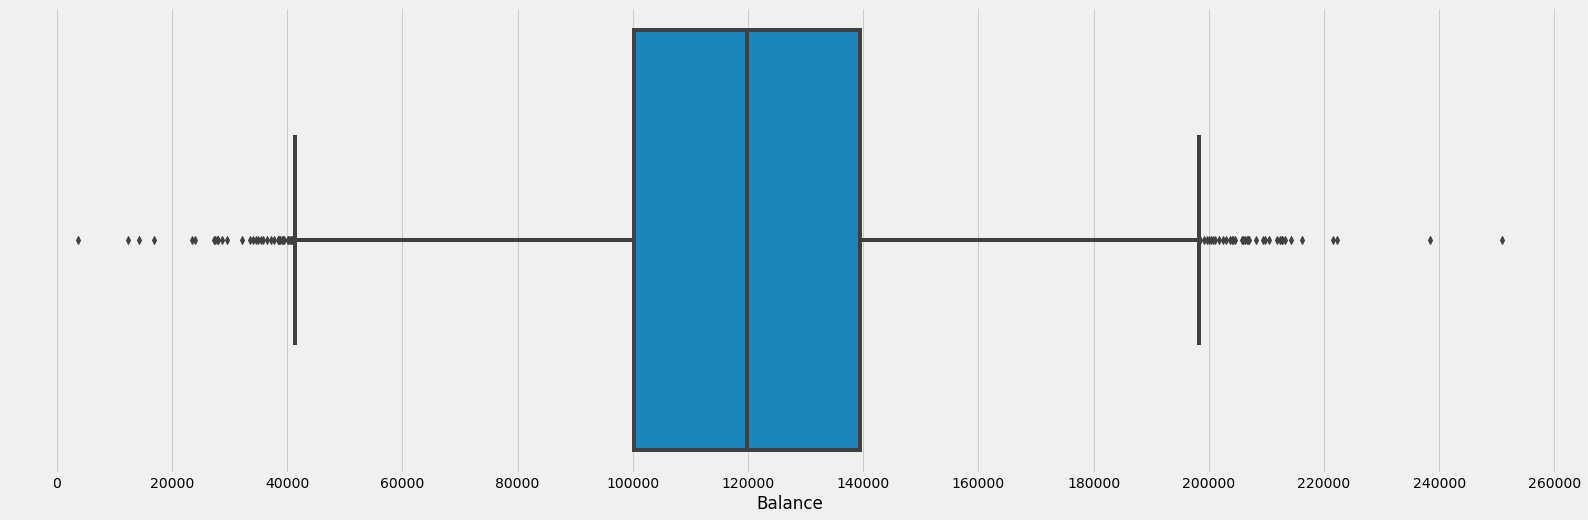

In [117]:
balance_data = churn_data[churn_data['Balance'] > 2500]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))

boxplot = sns.boxplot(
    data=balance_data,
    x='Balance',
    orient='h',
    width=0.9,
    ax=axes,
)
axes.xaxis.set_major_locator(ticker.MultipleLocator(20000))


Из полученного графика можно сделать такие выводы:
Медианное значение выборки - 120000
Первый квантиль - около 100000
Третий квантиль - около 140000
Нижняя граница - чуть больше 40000
Верхняя граница - чуть меньше 200000
Все значения, находящиеся вне диапазона 40000 и 200000 можно считать выбросами

Думаю, для анализа было бы интересно рассмотреть две категории клиентов - выбросы с правой и левой стороны, и сравнить характеристики клиентов, одни из которых держат в банке слишком мало денег, а вторые слишком много. Возможно в данном анализе так же можно присоединить клиентов за границами первого квантиля - к нижним выбросам, и тех, кто за границами третьего квантиля - к верхним.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Text(0, 0.5, 'Баланс')

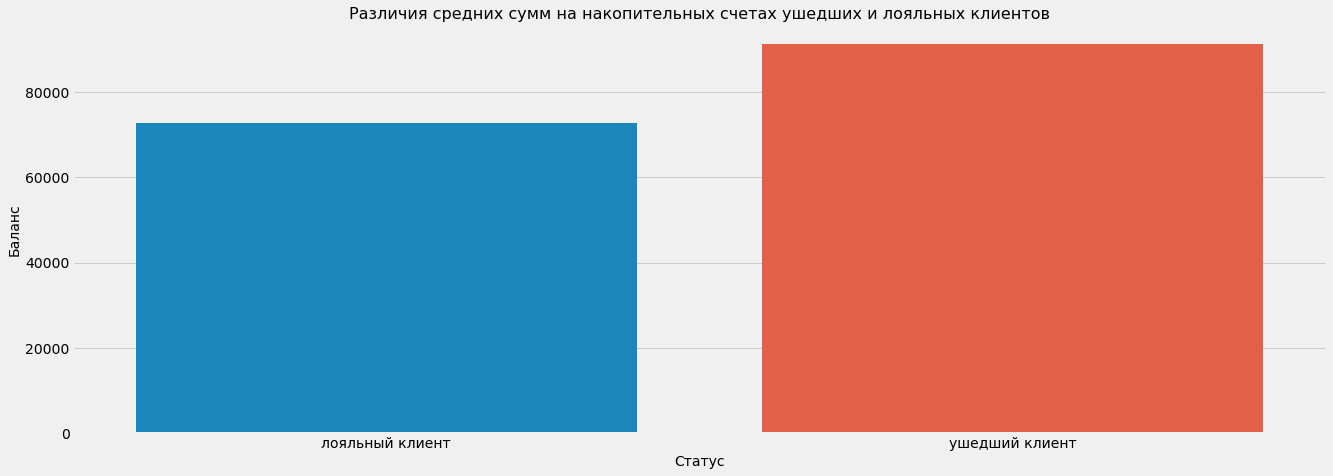

In [127]:
balance_df = churn_data[['Exited', 'Balance']]
balance_df = pd.DataFrame(balance_df.groupby('Exited', as_index=False)['Balance'].mean())
balance_df['Exited'] = balance_df['Exited'].apply(lambda x: 'ушедший клиент' if x == 1 else 'лояльный клиент')


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
barplot1 = sns.barplot(
    data=balance_df,
    x='Exited',
    y='Balance',
    orient='v'
)
barplot1.set_title('Различия средних сумм на накопительных счетах ушедших и лояльных клиентов', fontsize=16)
barplot1.set_xlabel('Статус', fontsize=14)
barplot1.set_ylabel('Баланс', fontsize=14)

На графике различия средних сумм на накопительных счетах ушедших и лояльных клиентов видно, что у ушедших клиентов баланс в среднем в банке выше, чем у лояльных. Это может говорить о том, что банк, например, предлагает невыгодные условия по вкладам, или он не кажется солидным для более обеспеченных клиентов.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

/var/folders/sl/l3rskhrs13qdsmkmgwnd1c5w0000gp/T/ipykernel_45404/1605002499.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departed_clients['count_age'] = churn_data['Age']


Text(0, 0.5, 'Статус')

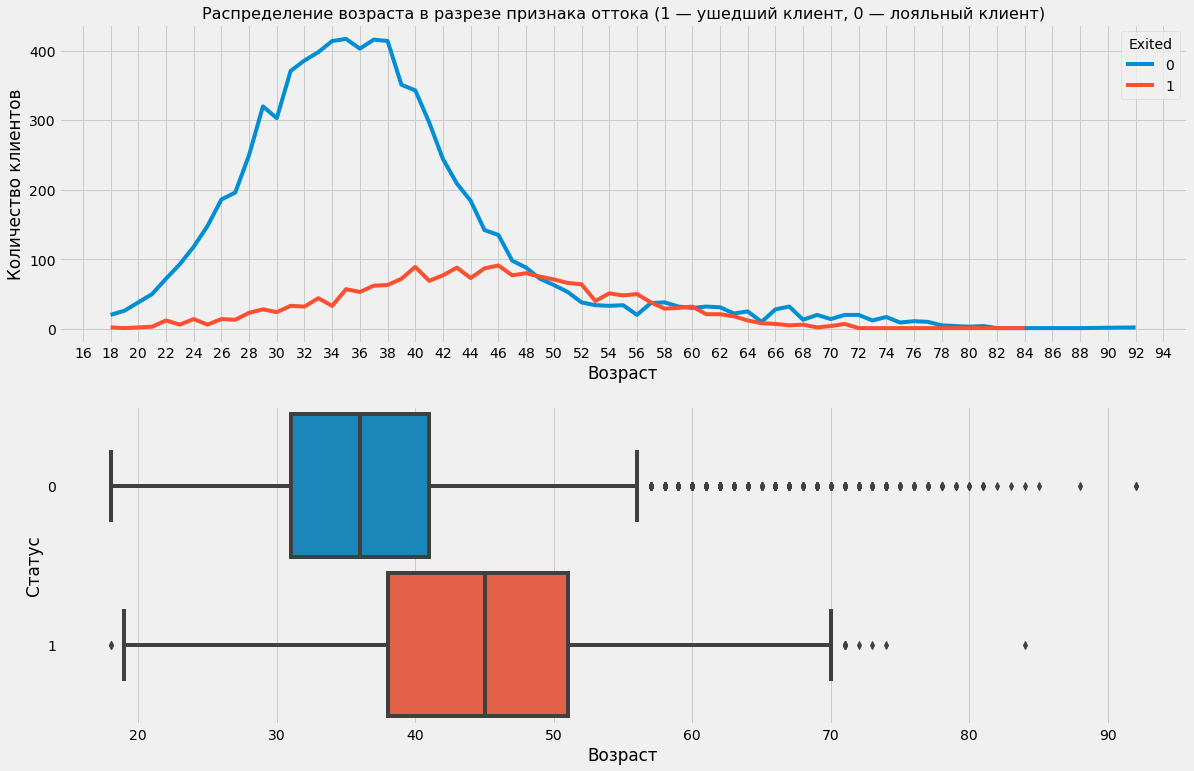

In [193]:
departed_clients = churn_data[['Exited', 'Age']]
departed_clients['count_age'] = churn_data['Age']
departed_clients = departed_clients.groupby(['Age', 'Exited'], as_index=False)['count_age'].count()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))

lineplot = sns.lineplot(
    x='Age',
    y="count_age",
    hue='Exited',
    # style="event",
    data=departed_clients,
    ax=axes[0]
)
lineplot.xaxis.set_major_locator(ticker.MultipleLocator(2))

lineplot.set_title('Распределение возраста в разрезе признака оттока (1 — ушедший, 0 — лояльный)', fontsize=16)
lineplot.set_xlabel('Возраст')
lineplot.set_ylabel('Количество клиентов')

boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h',
    width=0.9,
    ax=axes[1],
)
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel('Статус')

Потенциальных выбросов больше в группе лояльных клиентов. Я бы посоветовала банку обратить внимание на группы возрастов от 38 до 51 т.к. в этом промежутке отток выше всего, и от 49 до 57 т.к. в этом промежутке кол-во ушедших клиентов превышает кол-во лояльных.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [4]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.